<a href="https://colab.research.google.com/github/bhikhabhai/AppleClone/blob/main/FashMash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task


In [ ]:

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    # solutions.drawing_utils.draw_landmarks(
    #     image=annotated_image,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp.solutions.drawing_styles
    #     .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    # solutions.drawing_utils.draw_landmarks(
    #     image=annotated_image,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_IRISES,
    #       landmark_drawing_spec=None,
    #       connection_drawing_spec=mp.solutions.drawing_styles
    #       .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

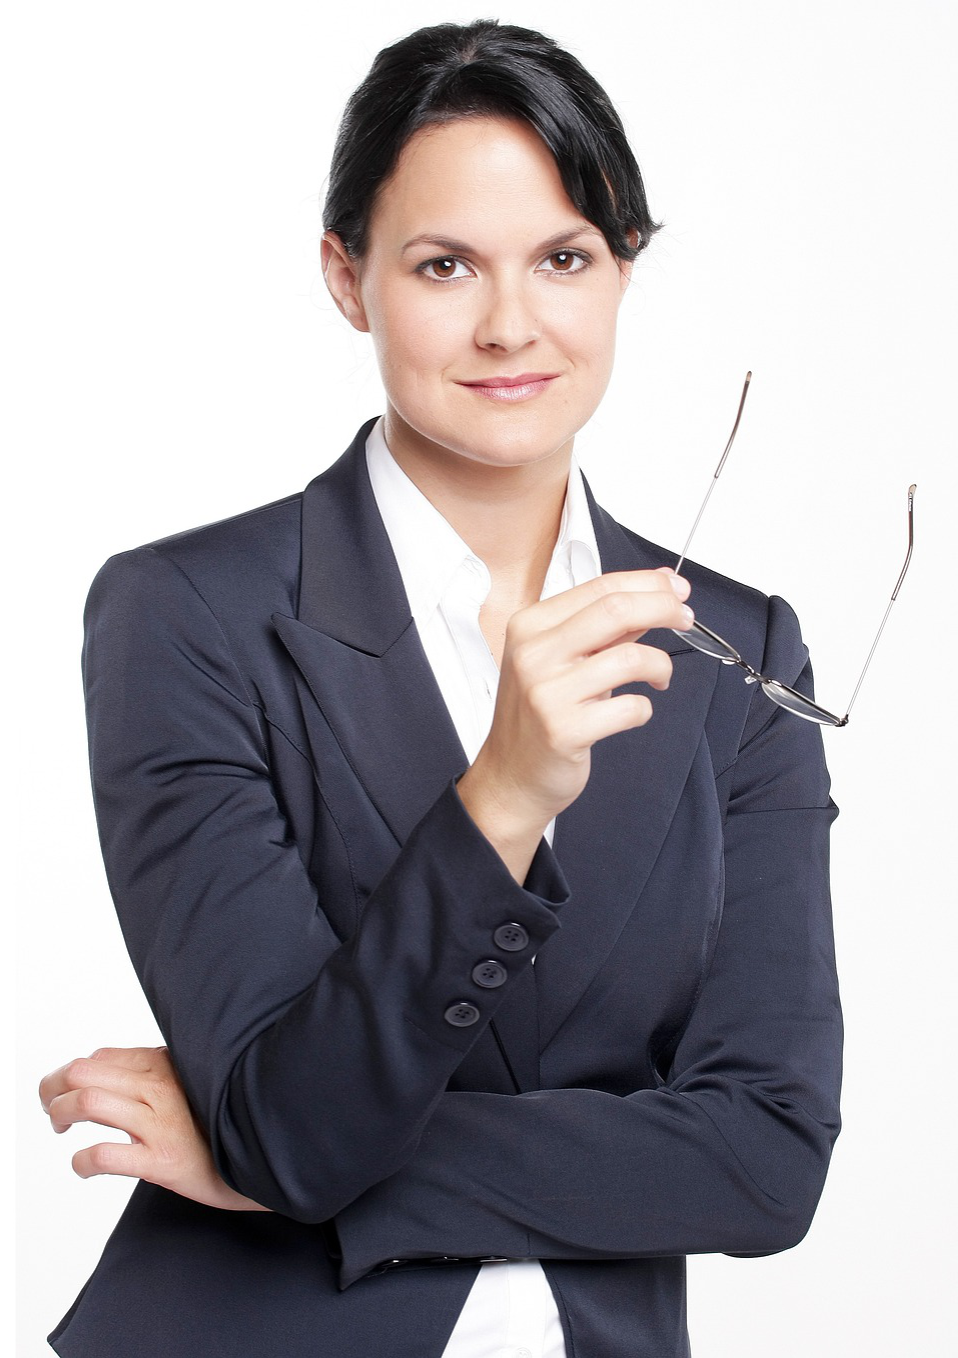

In [ ]:
# !wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

# import cv2
# from google.colab.patches import cv2_imshow

# img = cv2.imread("image.png")
# cv2_imshow(img)

In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

Saving 2_close.jpg to 2_close.jpg
Uploaded file: 2_close.jpg


In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)


# STEP 3: Load the input image.
# image = mp.Image.create_from_file("1_Open.jpg")
image = mp.Image.create_from_file("2_close.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

AttributeError: 'FaceLandmarkerResult' object has no attribute 'landmark'

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


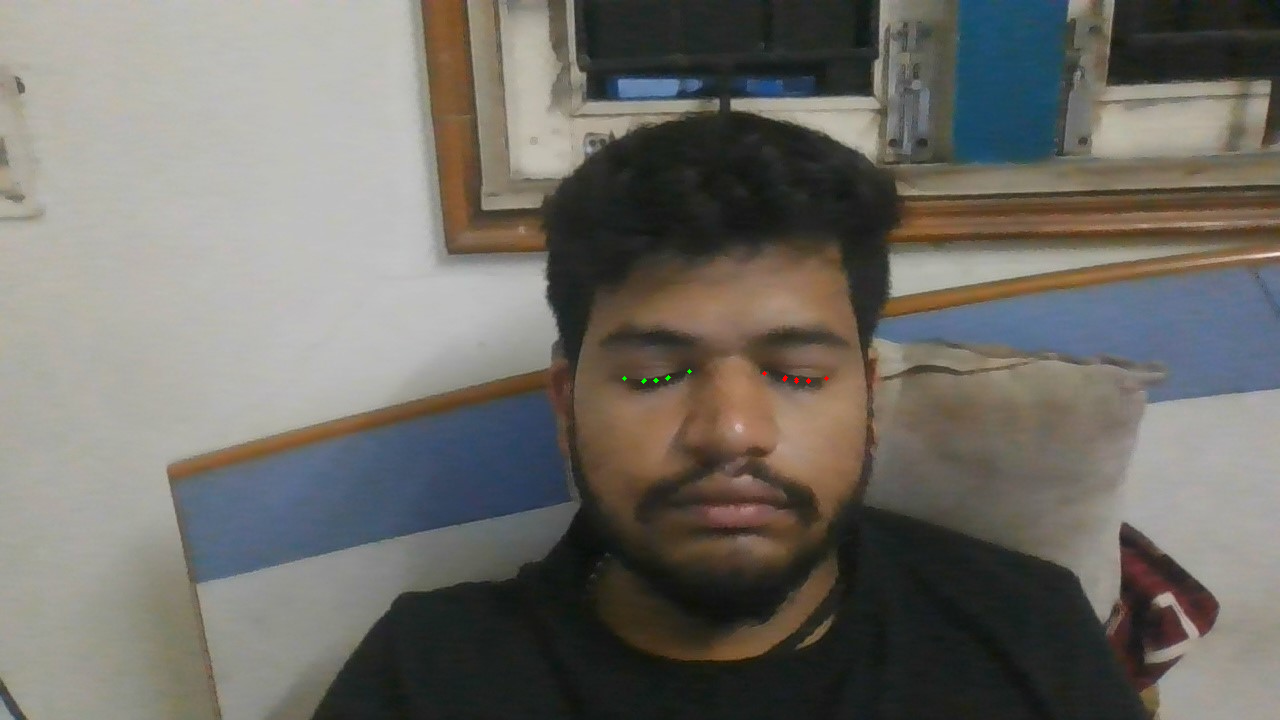

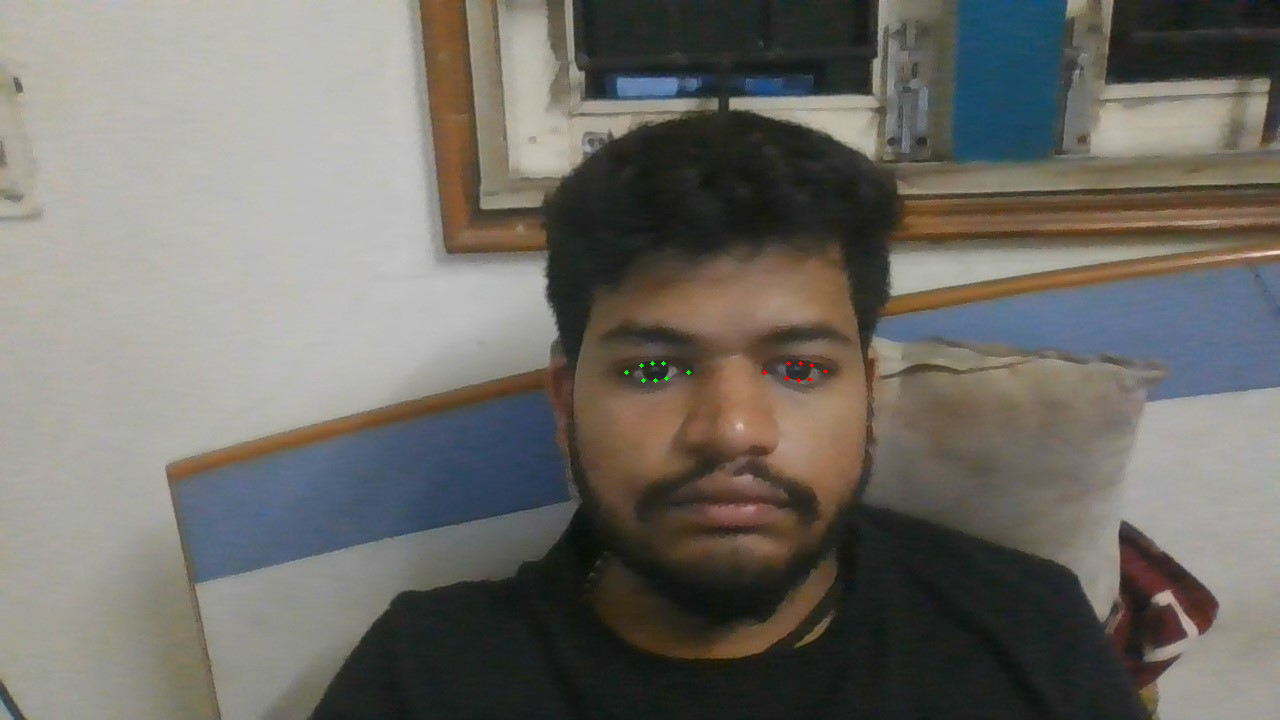

In [ ]:
import mediapipe as mp
import numpy as np
import cv2

# Indices for left and right eye landmarks (from the 468 landmarks)
LEFT_EYE_INDICES = [33, 133, 160, 158, 159, 144, 145, 153]
RIGHT_EYE_INDICES = [362, 263, 387, 385, 386, 373, 374, 380]

# Function to extract the eye points from landmarks
def extract_eye_landmarks(face_landmarks, indices):
    return np.array([[face_landmarks[i].x, face_landmarks[i].y, face_landmarks[i].z] for i in indices])

# Function to process and extract eye landmarks from detection result
def extract_eyes(detection_result):
    # Assuming detection_result.face_landmarks is a list
    face_landmarks = detection_result.face_landmarks[0]  # Extract the first face's landmarks
    left_eye_points = extract_eye_landmarks(face_landmarks, LEFT_EYE_INDICES)
    right_eye_points = extract_eye_landmarks(face_landmarks, RIGHT_EYE_INDICES)

    return left_eye_points, right_eye_points

# Function to draw eye landmarks on the image
def draw_eye_landmarks(image, eye_points, color=(0, 255, 0)):
    image_height, image_width, _ = image.shape
    for point in eye_points:
        x = int(point[0] * image_width)  # Denormalize x
        y = int(point[1] * image_height)  # Denormalize y
        cv2.circle(image, (x, y), 2, color, -1)  # Draw a small circle on each point

# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create a FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("2_close.jpg")
image_copy = image.numpy_view().copy()  # Copy the image for annotation

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Extract the eye landmarks (left and right)
left_eye_points, right_eye_points = extract_eyes(detection_result)

# STEP 6: Draw the eye landmarks on the image
draw_eye_landmarks(image_copy, left_eye_points, color=(0, 255, 0))  # Draw left eye in green
draw_eye_landmarks(image_copy, right_eye_points, color=(255, 0, 0))  # Draw right eye in blue

# STEP 7: Display the annotated image
cv2_imshow(cv2.cvtColor(image_copy, cv2.COLOR_RGB2BGR))



# STEP 3: Load the input image.
image1 = mp.Image.create_from_file("1_Open.jpg")
image_copy1 = image1.numpy_view().copy()  # Copy the image for annotation

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image1)

# STEP 5: Extract the eye landmarks (left and right)
left_eye_points, right_eye_points = extract_eyes(detection_result)

# STEP 6: Draw the eye landmarks on the image
draw_eye_landmarks(image_copy1, left_eye_points, color=(0, 255, 0))  # Draw left eye in green
draw_eye_landmarks(image_copy1, right_eye_points, color=(255, 0, 0))  # Draw right eye in blue

# STEP 7: Display the annotated image
cv2_imshow(cv2.cvtColor(image_copy1, cv2.COLOR_RGB2BGR))


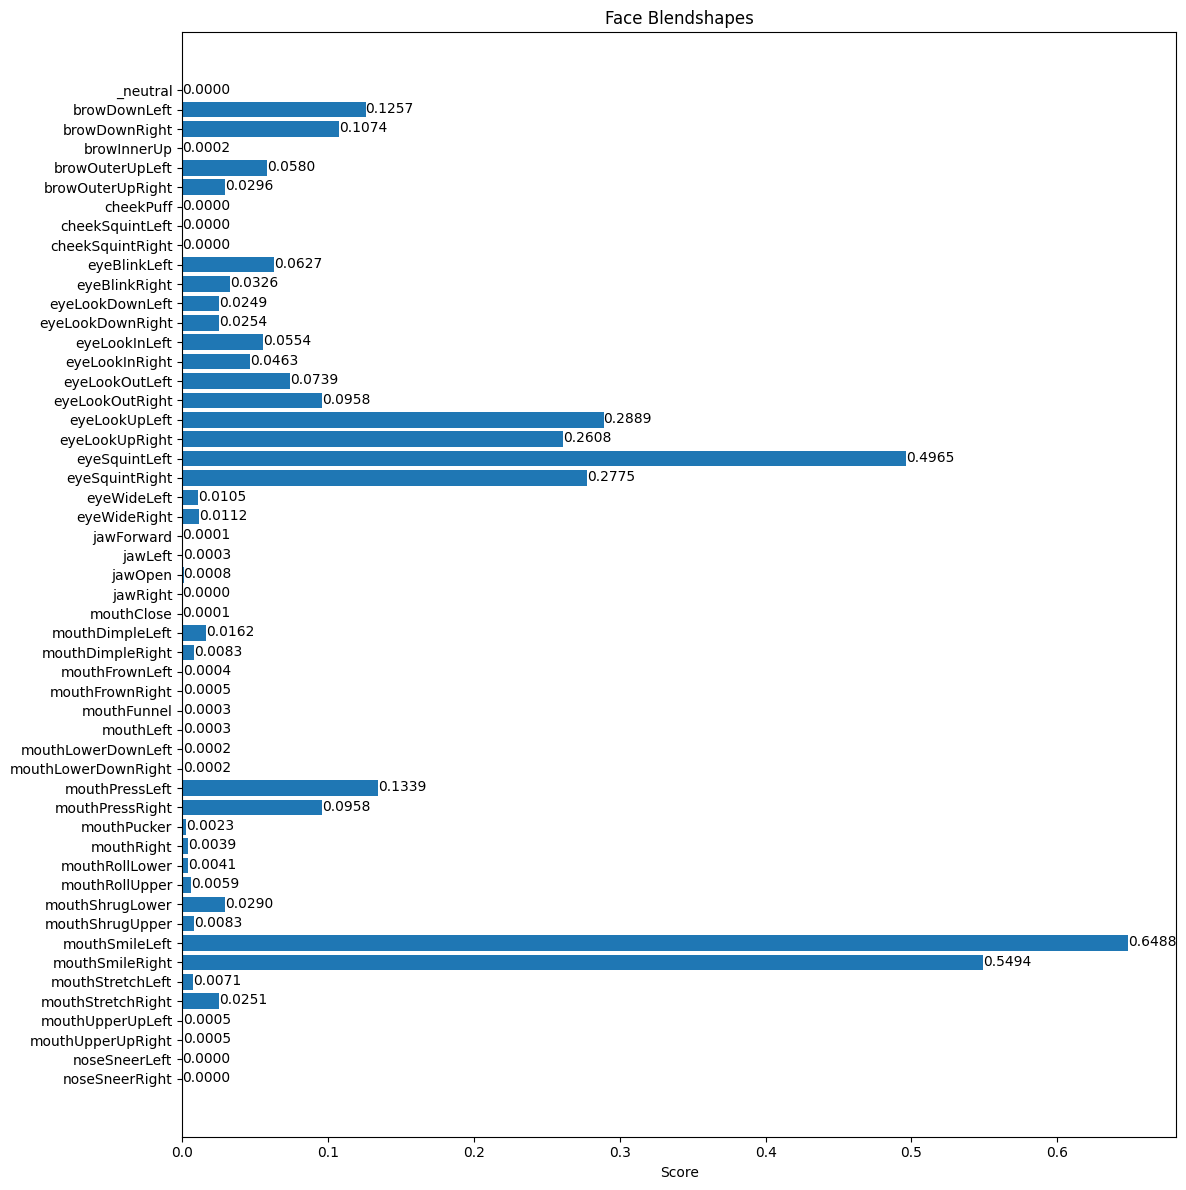

In [ ]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [ ]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.92205501e-01, -6.04903474e-02,  1.08946197e-01,
         1.18711746e+00],
       [ 9.10740122e-02,  9.48733926e-01, -3.02671373e-01,
         2.23701134e+01],
       [-8.50522369e-02,  3.10234487e-01,  9.46847558e-01,
        -6.80049210e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
